<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

## Load and clean the data
Firstly, I would like to load the data, and do some necessary data cleaning

In [2]:
# Load the data
house = pd.read_csv('./data/housing.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Shape of the dataset
house.shape

(1460, 81)

In [5]:
# Have a look at the columns
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Info of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Check the missing values in 'MasVnrType' and 'MasVnrType' (I guess null values of these two columns should appear 
# at the same entries, then I check to see if it is the case. This will help me decise how to handle the null 
# values for these two features.)

house[house['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [8]:
# There are quite a lot of null values. I am going to handle the missing values use the following strategies:

# 1. Replace numerical NaNs with mean value: 'LotFrontage'
house['LotFrontage'].fillna(round(house.LotFrontage.mean(),1), inplace=True)

# 2. Replace categorical NaNs with the most frequent one (? impact to model performance): 'MasVnrType','Electrical',
#    'MasVnrArea'(values base on the related 'MasVnrType')
house['MasVnrType'].fillna(house['MasVnrType'].mode().values[0], inplace=True)
house['MasVnrArea'].fillna(house[house['MasVnrType']=='None'].MasVnrArea.mode().values[0], inplace=True)
house['Electrical'].fillna(house['Electrical'].mode().values[0], inplace=True)   

# 3. The following columns, NaN has actual meaning other than refering to missing value:(Just leave them as nan?) 
'''
   'Alley' (NA),
   'BsmtQual'(NaNs probably means 'no basement'), 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 
   'FireplaceQu'(NaNs probably means 'no fireplace'), 
   'GarageType'(NaNs probably means 'no garage'), 'GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond', 
   'PoolQC'(NaNs probably means 'no pool'), 
   'Fence'(NaNs probably means 'no fence'),
   'MiscFeature' (NA)
'''
# 4. After trying build the model, I found that nan value has impact on modeling, machine learning doesn't work 
# when there is null value. Then I need to replace the null value with 0 for those numerical columns. categorical 
# columns are ok because when use dummy code features the null value will be automactically ignored.

house['GarageYrBlt'].fillna(0.0, inplace=True) # use 0 because null value in this column means no garage

In [9]:
# Check if null values has been replaced
print(house['LotFrontage'].isnull().sum())
print(house['MasVnrType'].isnull().sum())
print(house['MasVnrArea'].isnull().sum())
print(house['Electrical'].isnull().sum())
print(house['GarageYrBlt'].isnull().sum())

0
0
0
0
0


In [10]:
# check the unique values of 'MSZoning' column to identify residential houses 
house.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [11]:
# check value_counts of ['MSZoning'] column
house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [12]:
# generate a subset that excludes non-residential entries
house_R = house[house.MSZoning != 'C (all)']
house_R['MSZoning'].value_counts()

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

## EDA
Now I am going to do a Exploratory Data Analysis to get some understandings of the dataset house_R

In [13]:
# Firstly, before I look into the data, I would like to guess what features are greatly contribute to house sale price
# base on my business acumen(How accurate is my instinct? Test out!)
'''
'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath', 'Bedroom', 'KitchenQual', 
'TotRmsAbvGrd'
'''

"\n'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath', 'Bedroom', 'KitchenQual', \n'TotRmsAbvGrd'\n"

In [14]:
# As the dataset has 81 columns, it might be hard to visualize the whole dataset.
# I decided to get a correlation matrix to check what numerical features are strongly related to SalePrice
house_R.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.015291,-0.010363,-0.034304,-0.030440,0.010907,-0.017656,-0.021695,-0.052487,-0.003892,...,-0.031547,0.002112,0.007034,-0.047043,0.002628,0.057108,-0.007071,0.025820,-0.000176,-0.024353
MSSubClass,0.015291,1.000000,-0.358458,-0.139725,0.028891,-0.063504,0.030056,0.035989,0.023617,-0.074762,...,-0.012677,-0.002789,-0.011016,-0.044032,-0.030057,0.008308,-0.007172,-0.015808,-0.019356,-0.087487
LotFrontage,-0.010363,-0.358458,1.000000,0.306396,0.239013,-0.050337,0.118855,0.082589,0.179459,0.218611,...,0.077496,0.143300,0.011124,0.062527,0.038382,0.181499,-0.000653,0.009678,0.005430,0.337567
LotArea,-0.034304,-0.139725,0.306396,1.000000,0.106457,-0.006074,0.012958,0.013475,0.103071,0.214794,...,0.171632,0.087333,-0.016954,0.020349,0.043435,0.077652,0.037468,0.001500,-0.013579,0.264715
OverallQual,-0.030440,0.028891,0.239013,0.106457,1.000000,-0.107874,0.567392,0.544850,0.405799,0.235139,...,0.234394,0.320894,-0.104417,0.029411,0.062759,0.065112,-0.030910,0.078088,-0.024962,0.789031
OverallCond,0.010907,-0.063504,-0.050337,-0.006074,-0.107874,1.000000,-0.390446,0.067475,-0.130376,-0.053095,...,-0.008204,-0.034037,0.079229,0.025010,0.053216,-0.002421,0.069996,0.003308,0.046202,-0.089084
YearBuilt,-0.017656,0.030056,0.118855,0.012958,0.567392,-0.390446,1.000000,0.590105,0.308690,0.248222,...,0.220369,0.197950,-0.380911,0.030387,-0.051326,0.004250,-0.034681,0.017254,-0.009111,0.517602
YearRemodAdd,-0.021695,0.035989,0.082589,0.013475,0.544850,0.067475,0.590105,1.000000,0.173008,0.123137,...,0.201867,0.237689,-0.187094,0.044605,-0.042288,0.005259,-0.009716,0.023540,0.040420,0.501186
MasVnrArea,-0.052487,0.023617,0.179459,0.103071,0.405799,-0.130376,0.308690,0.173008,1.000000,0.260390,...,0.157778,0.126115,-0.106982,0.018708,0.062015,0.011671,-0.029415,-0.004747,-0.006922,0.471056
BsmtFinSF1,-0.003892,-0.074762,0.218611,0.214794,0.235139,-0.053095,0.248222,0.123137,0.260390,1.000000,...,0.203239,0.111795,-0.098826,0.026138,0.059746,0.140668,0.004120,-0.017519,0.018654,0.384475


In [15]:
# The matrix is still too large to show on the screen. I then write a for loop to show those features that has a 
# strong correlation with 'SalePrice' (let's say abs(corr) > 0.4)

columns = list(house_R.columns)
columns.remove('SalePrice')

dict_corr ={}
for col in columns:
    try: 
        corr_num = house_R[[col, 'SalePrice']].corr().values[0,1]
        if abs(corr_num) > 0.4:
            dict_corr[col] = corr_num
    except:
        pass
df_corr = pd.DataFrame(dict_corr.items(), columns=['feature','corr_with_SalePrice'])
df_corr = df_corr.sort_values('corr_with_SalePrice', ascending=False)
df_corr

,feature,corr_with_SalePrice
0,OverallQual,0.789031
6,GrLivArea,0.708658
10,GarageCars,0.642135
11,GarageArea,0.629831
4,TotalBsmtSF,0.612088
5,1stFlrSF,0.603300
7,FullBath,0.556674
8,TotRmsAbvGrd,0.533355
1,YearBuilt,0.517602
2,YearRemodAdd,0.501186


In [16]:
# From the above result, among those whose correlation with sale price larger than 0.4, 50 percent of them are in my 
# business acumen guessing list. That means my guessing is not bad :)

Text(0.5, 1.0, 'House median price changed over time')

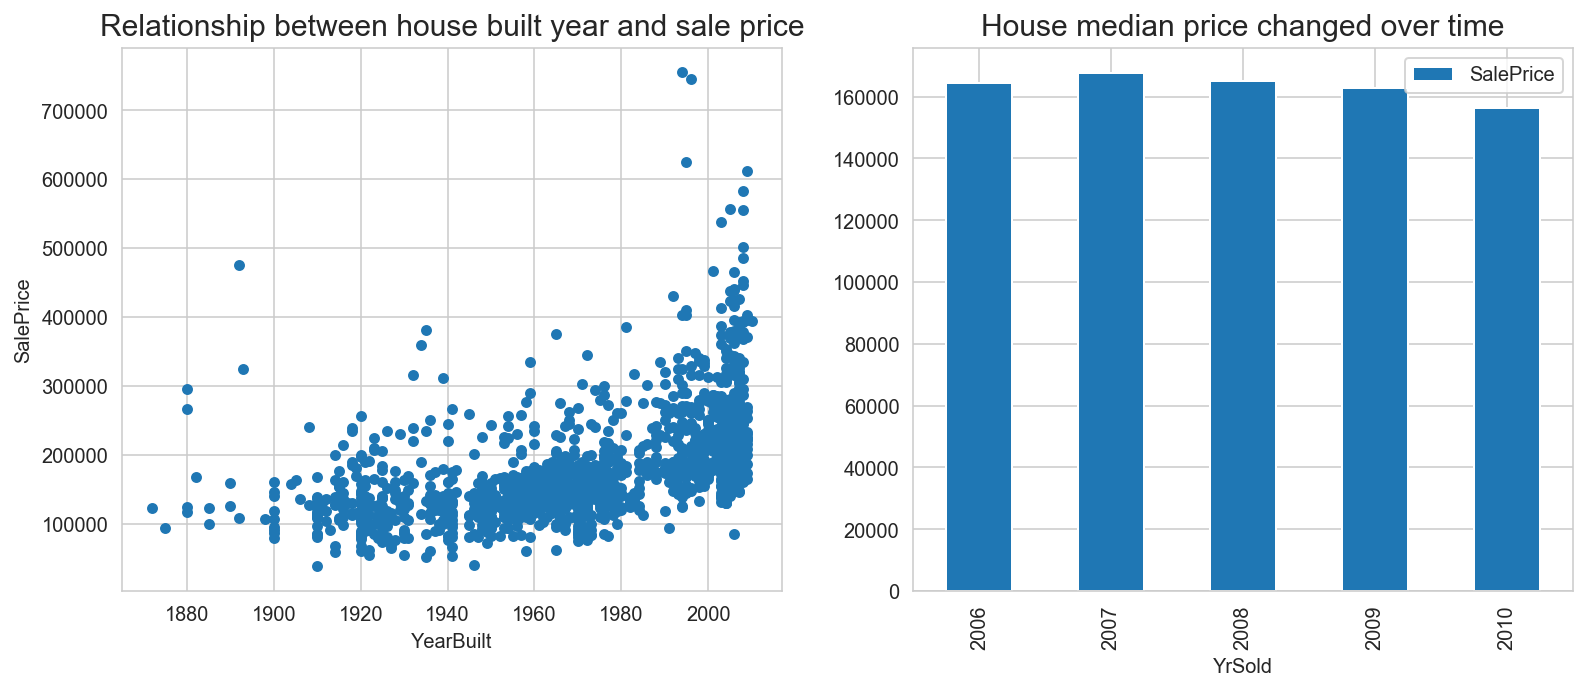

In [17]:
# Now I would also like to visualize the relationship between 'YearBuilt' and 'SalePrice', and plot how house median 
# price has change over years. 

fig, axes = plt.subplots(1,2, figsize = (13,5), squeeze=False)
house_R.plot.scatter(ax=axes[0][0], x='YearBuilt', y='SalePrice')
house_R[['YrSold','SalePrice']].groupby('YrSold').median().plot.bar(ax=axes[0][1])
axes[0][0].set_title('Relationship between house built year and sale price', fontsize=15)
axes[0][1].set_title('House median price changed over time', fontsize=15)

# The scatter plot shows that the newer houses tends to got a higher sale price than older houses.
# The bar chart shows that the median prices of houses decreased since from 2007.

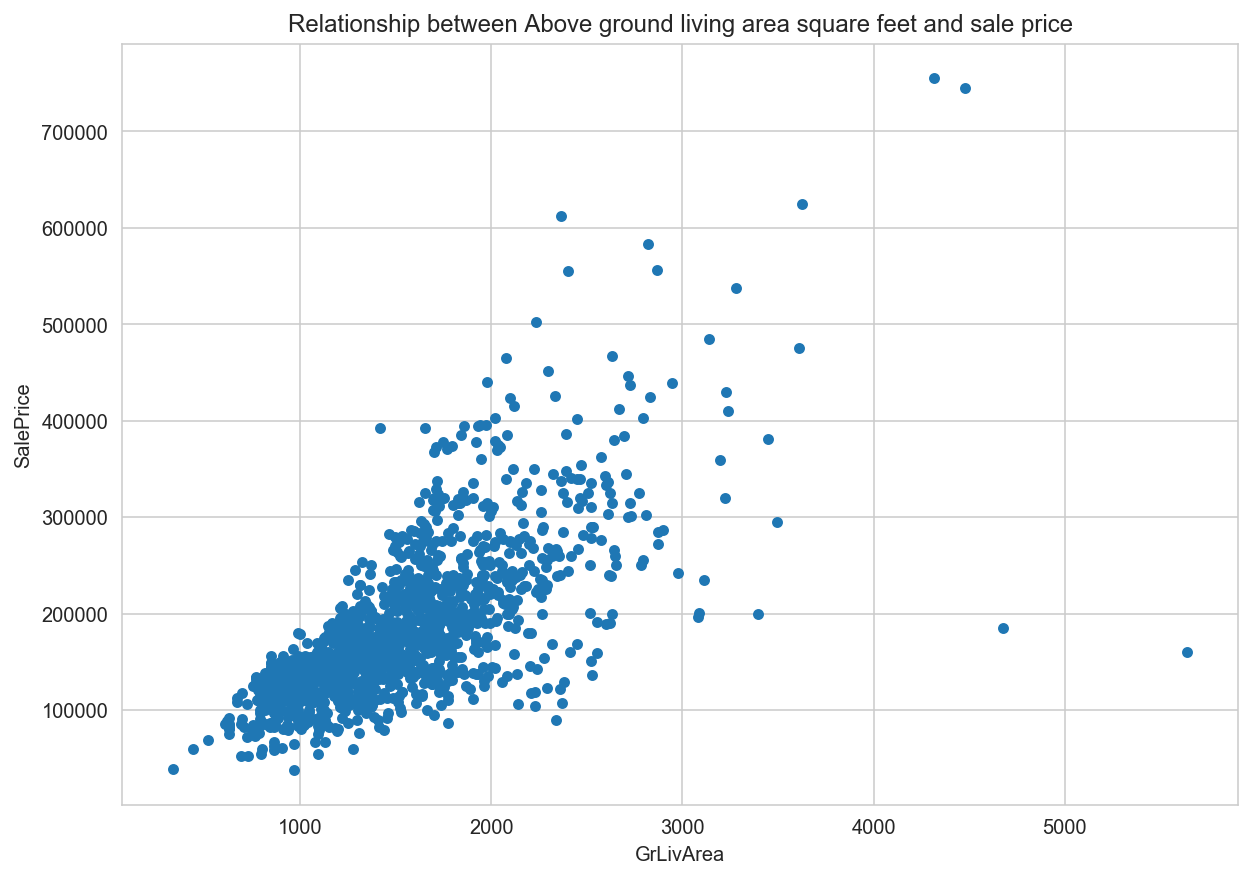

In [18]:
# I would also like to visualize the relationship between 'GrLivArea' and 'SalePrice'
house_R.plot.scatter(x='GrLivArea', y='SalePrice', figsize=(10,7), 
                     title='Relationship between Above ground living area square feet and sale price')
# From the scatter plot, it looks that there is a linear relationship between the square feet of above ground living 
# area and the sold price of the house. The larger the house the higher the sold price. 

In [19]:
# By now, I have done some exploration on house characteristics and their influence on house sale price. 
# Next step I am going to build models, use the house characteristics to predict house price.

## Modeling - Predict house sale price with fixed features
#### (build a estimator for the price of the house given characteristics of the house that cannot be renovated)

In [20]:
# I have found out that some house characteristics have great influence on sale price of the house while the others 
# has less effect on house sale price. However, house price is complex. It was decided and affected by many factors.
# In order not to miss any important factor, I decided include the whole set of fixed features for modeling.

In [21]:
# Firstly, split the features into two groups: fixed features and renovate able features.
# Identify fixed features
fixed_features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street','Alley', 'LotShape', 
                  'LandContour', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                  'BldgType','HouseStyle', 'YearBuilt', 'YearRemodAdd','MasVnrType',
                  'MasVnrArea','Foundation', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'BsmtFullBath', 
                  'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
                  'Fireplaces', 'GarageType','GarageYrBlt', 'GarageCars', 'GarageArea', 'PoolArea', 'MoSold', 
                  'YrSold', 'SaleType','SaleCondition']
# 'Id' was excluded because it would not affect sale price.
# 'SalePrice' was excluded because it would be the dependent variable that we are going to build the model to predict.

In [22]:
# Identify renovate-able features (All other varialbes except fixed_features, 'Id', and 'SalePrice')
renovate_able_features = ['RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd','ExterQual', 'ExterCond','BsmtCond',
                          'Heating','HeatingQC', 'CentralAir', 'Electrical','LowQualFinSF','KitchenQual',
                          'FireplaceQu', 'GarageFinish','GarageQual','GarageCond', 'PavedDrive', 'WoodDeckSF', 
                          'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC','Fence', 'MiscFeature', 
                          'MiscVal', 'Utilities', 'OverallQual', 'OverallCond', 'BsmtExposure','BsmtFinType1', 
                          'BsmtFinSF1','BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF'] 

In [23]:
# Generate a subset that only includes fixed_features and 'SalePrice'
house_R_fixed =pd.concat([house_R[fixed_features], house_R['SalePrice']], axis=1)
house_R_fixed.shape

(1450, 44)

In [24]:
# Secondly, I need to do a further preprocessing on the data so that it is suitable for machine learning modeling.
# check what columns in the subset are object type and need to be converted to boolean type by dummies
house_R_fixed[fixed_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1450 non-null   int64  
 1   MSZoning       1450 non-null   object 
 2   LotFrontage    1450 non-null   float64
 3   LotArea        1450 non-null   int64  
 4   Street         1450 non-null   object 
 5   Alley          89 non-null     object 
 6   LotShape       1450 non-null   object 
 7   LandContour    1450 non-null   object 
 8   LotConfig      1450 non-null   object 
 9   LandSlope      1450 non-null   object 
 10  Neighborhood   1450 non-null   object 
 11  Condition1     1450 non-null   object 
 12  Condition2     1450 non-null   object 
 13  BldgType       1450 non-null   object 
 14  HouseStyle     1450 non-null   object 
 15  YearBuilt      1450 non-null   int64  
 16  YearRemodAdd   1450 non-null   int64  
 17  MasVnrType     1450 non-null   object 
 18  MasVnrAr

In [25]:
# Create a list for object type columns
object_columns = ['MSZoning','Street', 'Alley', 'LotShape','LandContour','LotConfig','LandSlope', 'Neighborhood',
                  'Condition1','Condition2','BldgType','HouseStyle','MasVnrType','Foundation','BsmtQual','Functional',
                  'GarageType','SaleType','SaleCondition']

In [26]:
# Write a for loop to convert categorical columns to dummy coded columns, and then attach the dummies to the dataset

house_R_fixed_cleaned=house_R_fixed
for col in object_columns:
    col_dummy = pd.get_dummies(house_R_fixed[col], prefix=col)
    house_R_fixed_cleaned = pd.concat([house_R_fixed_cleaned, col_dummy], axis=1)

In [27]:
# Check the shape of the new dataset
house_R_fixed_cleaned.shape

(1450, 165)

In [28]:
# Drop the original object type columns from the dataframe
for col in object_columns:
    house_R_fixed_cleaned.drop(col, axis=1, inplace=True)
house_R_fixed_cleaned.shape

(1450, 146)

In [29]:
# Set up predictors X and target y. Predictors will be the fixed features, and target is the sale price.
y = house_R_fixed_cleaned['SalePrice']
features = list(house_R_fixed_cleaned.columns)
features.remove('SalePrice')
X = house_R_fixed_cleaned[features]

In [30]:
# check unique values of 'YrSold'
house_R_fixed_cleaned['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

In [31]:
# Subset the data for houses that were sold before 2010 and the houses that were sold in 2010
house_R_fixed_cleaned_pre2010 = house_R_fixed_cleaned[house_R_fixed_cleaned['YrSold'] != 2010]
house_R_fixed_cleaned_2010 = house_R_fixed_cleaned[house_R_fixed_cleaned['YrSold'] == 2010]
print(house_R_fixed_cleaned_pre2010.shape)
print(house_R_fixed_cleaned_2010.shape)

(1278, 146)
(172, 146)


In [32]:
# Split the data for training and testing
X_train = house_R_fixed_cleaned_pre2010[features]
X_test = house_R_fixed_cleaned_2010[features]
y_train = house_R_fixed_cleaned_pre2010['SalePrice']
y_test = house_R_fixed_cleaned_2010['SalePrice']
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1278, 145)
(172, 145)
(1278,)
(172,)


In [33]:
# Standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_stad = ss.fit_transform(X_train)
X_test_stad = ss.fit_transform(X_test)

In [34]:
# use sklearn package to build a linear model to predict price
# (Why sklearn: sklearn is a machine learning package, it is more prediction focus compare to statsmodels)
from sklearn import linear_model
from sklearn.model_selection import train_test_split

lm = linear_model.LinearRegression()
lm.fit(X_train_stad, y_train)
lm.predict(X_test_stad)
lm.score(X_test_stad, y_test)

# So far the model perform poorly.(The reason may be because we fit the model with house data that sold before 2010,
# but test the model by data of house sold in 2010. house price actually vary over time.)

-1.3727588217984518e+24

In [35]:
# Let's use cross validation to measure the model's performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lm, X, y, cv=5)
print('Cross validated scores:', scores)
print('Mean score:', scores.mean())

# By using cross validation,  the model looks perform much better

Cross validated scores: [0.84859804 0.79378376 0.81428405 0.84771966 0.6677354 ]
Mean score: 0.7944241826678489


In [36]:
# Try impose a penalty on the coefficients of the model
# Try Ridge and RidgeCV
from sklearn.linear_model import RidgeCV,Ridge
r=Ridge()
rcv=RidgeCV()


r.fit(X_train_stad, y_train)
r.predict(X_test_stad)
print('Ridge model score:', r.score(X_test_stad, y_test))

rcv.fit(X_train_stad, y_train)
rcv.predict(X_test_stad)
print('RidgeCV model score:', rcv.score(X_test_stad, y_test))

# It looks that Ridge model performs better than the one that without any penalty

Ridge model score: 0.8796937375635587
RidgeCV model score: 0.881053737477599


In [37]:
# Try Lasso and LassoCV
from sklearn.linear_model import Lasso, LassoCV
l = Lasso(max_iter=2000)
lcv = LassoCV(max_iter=2000, cv=5)

l.fit(X_train_stad, y_train)
l.predict(X_test_stad)
print('Lasso model score:', l.score(X_test_stad, y_test))

lcv.fit(X_train_stad, y_train)
lcv.predict(X_test_stad)
print('LassoCV model score:', lcv.score(X_test_stad, y_test))

# Base on the score, Lasso and LassoCV's performance are very close to Ridge and RidgeCV.

Lasso model score: 0.8790602862037922
LassoCV model score: 0.8717936391503702


/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373507469905.04626, tolerance: 798897842.8485528
  positive)


In [38]:
# Try ElasticNet (it is said that ElasticNet works well when you are not sure if there is any irrelevant feature, 
# or any features that are correlated with each other. I want to find out if it is true.)

from sklearn.linear_model import ElasticNet, ElasticNetCV

enet = ElasticNet()
enet.fit(X_train_stad, y_train)
print('ElasticNet model score:', enet.score(X_test_stad, y_test))

enet_cv = ElasticNetCV(cv=5)
enet_cv.fit(X_train_stad, y_train)
print('ElasticNetCV model score:', enet_cv.score(X_test_stad, y_test))

# Again, ElasticNet's performance is very close to Ridge and Lasso, while ElasticNetCV performs much worse. Why?

ElasticNet model score: 0.8715567506251957
ElasticNetCV model score: 0.20544679424668555


In [39]:
# Let's keep trying. If use cross validation to all the models has been built so far, what will happen?

from sklearn.model_selection import cross_val_score

scores_r = cross_val_score(r, X, y, cv=5)
print('Ridge_Cross validated scores:', scores_r)
print('Ridge_Cross validated mean score:', scores_r.mean())

scores_rcv = cross_val_score(rcv, X, y, cv=5)
print('RidgeCV_Cross validated scores:', scores_rcv)
print('RidgeCV_Cross validated mean score:', scores_rcv.mean())

scores_l = cross_val_score(l, X, y, cv=5)
print('Lasso_Cross validated scores:', scores_l)
print('Lasso_Cross validated mean score:', scores_l.mean())

scores_lcv = cross_val_score(lcv, X, y, cv=5)
print('LassoCV_Cross validated scores:', scores_lcv)
print('LassoCV_Cross validated mean score:', scores_lcv.mean())

scores_enet = cross_val_score(enet, X, y, cv=5)
print('ElasticNet_Cross validated scores:', scores_enet)
print('ElasticNet_Cross validated mean score:', scores_enet.mean())

scores_enet_cv = cross_val_score(enet_cv, X, y, cv=5)
print('ElasticNetCV_Cross validated scores:', scores_enet_cv)
print('ElasticNetCV_Cross validated mean score:', scores_enet_cv.mean())

# Base on the scores: by cross validation, the scores of Ridge/RidgeCV, Lasso/LassoCV and ElasticNet models lower down
# a little bit, but are still around 0.7-0.8. As the scores are pretty high, and they looks quite regular for 
# different fold of data, I consider these models perform well.

# ElasticNetCV model performs much better than before by using cross validation.(score increased from 0.2 to 0.58)

# RidgeCV/LassoCV/ElasticNetCV is good for finding out if the model is overfitting.(If the scores vary a lot, 
# it might indicate the model is overfitting). In this case, although the models might be a bit overfitting because 
# the scores looks a little bit too high, but since the scores are quite consistent, there shouldn't be high level of
# overfitting.

Ridge_Cross validated scores: [0.85716851 0.79873739 0.84553823 0.85310715 0.6754754 ]
Ridge_Cross validated mean score: 0.8060053354875748
RidgeCV_Cross validated scores: [0.86830358 0.81057602 0.8556872  0.86294632 0.67307614]
RidgeCV_Cross validated mean score: 0.8141178537164382


/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504374813587.5844, tolerance: 749719395.1956131
  positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459455092637.6559, tolerance: 719135603.0410497
  positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380138268637.43604, tolerance: 688942600.5972854
  positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might

Lasso_Cross validated scores: [0.84978033 0.79474799 0.81456687 0.84863654 0.66702346]
Lasso_Cross validated mean score: 0.7949510382502246
LassoCV_Cross validated scores: [0.79141235 0.73333238 0.75958793 0.72928472 0.4907026 ]
LassoCV_Cross validated mean score: 0.7008639975702131


/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 912110446875.5535, tolerance: 749719395.1956131
  positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809109477482.9613, tolerance: 719135603.0410497
  positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835759015411.0637, tolerance: 688942600.5972854
  positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might 

ElasticNet_Cross validated scores: [0.8236629  0.77423352 0.8143677  0.79999829 0.57242957]
ElasticNet_Cross validated mean score: 0.7569383975082056
ElasticNetCV_Cross validated scores: [0.64655886 0.60928565 0.59801346 0.57422824 0.47781451]
ElasticNetCV_Cross validated mean score: 0.5811801414973974


In [40]:
# If given more time, I would also like to try polynomial regression. 

In [41]:
# So far I am happy with Ridge and Lasso models. I might more pefer Lasso because it apply more strick constrain and 
# will filter out the irrelavant features.

In [42]:
# Check what features have been exclued by Lasso model
coefs = list(l.coef_)
coefs_list = list(zip(features, coefs))

coefs_zero = []
for elem in coefs_list:
    if elem[1] == 0.0:
        coefs_zero.append(elem)
coefs_zero

[('MSZoning_RL', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_Inside', 0.0),
 ('LandSlope_Gtl', -0.0),
 ('Condition1_Norm', 0.0),
 ('Condition2_RRNn', 0.0),
 ('MasVnrType_Stone', 0.0),
 ('Foundation_CBlock', -0.0)]

In [43]:
# Check what are the top 20 features that affect house sale price
def sortSecond(elem): 
    return abs(elem[1])

coefs_remained = []
for elem in coefs_list:
    if elem[1] != 0.0:
        coefs_remained.append(elem)
coefs_sorted = sorted(coefs_remained, key=sortSecond, reverse=True)
coefs_sorted[0:20]

[('GrLivArea', 30543.970533222157),
 ('GarageType_Attchd', 12031.801416186972),
 ('GarageCars', 11612.385336367866),
 ('BsmtQual_Ex', 11313.158621047365),
 ('Neighborhood_NridgHt', 10400.083806690995),
 ('GarageType_Detchd', 10318.892402810745),
 ('Neighborhood_NoRidge', 8776.422603266225),
 ('2ndFlrSF', 8388.149117039045),
 ('GarageYrBlt', -7469.915720127859),
 ('Neighborhood_StoneBr', 7086.148843639549),
 ('HouseStyle_1Story', 6582.706218040626),
 ('BsmtFullBath', 6313.655331839571),
 ('YearRemodAdd', 6111.384259552036),
 ('LotArea', 6083.55978942101),
 ('Condition2_PosN', -6069.413998467894),
 ('GarageType_BuiltIn', 5719.186722656599),
 ('KitchenAbvGr', -5705.373606542536),
 ('YearBuilt', 5184.0873499336885),
 ('Neighborhood_Edwards', -4988.789650593123),
 ('BedroomAbvGr', -4709.257570380628)]

In [44]:
# Check what features has relatively lower impact on house price base on Lasso model
def sortFeature(elem): 
    return elem[0]

Features_sorted = sorted(coefs_sorted[-20:], key=sortFeature)
Features_sorted

[('BsmtQual_Fa', 85.2333349609152),
 ('Condition1_PosA', 186.9155194944409),
 ('Condition1_RRAn', 149.12660764227522),
 ('Condition1_RRNe', 1.0953141973920484),
 ('Condition1_RRNn', -85.88405106411157),
 ('Condition2_Artery', -116.12397003926392),
 ('Condition2_Norm', 182.82999553915585),
 ('Foundation_Stone', 18.919233211154797),
 ('GarageType_2Types', 8.755487477669824),
 ('LandContour_Low', 37.60906198717783),
 ('LotShape_IR1', 19.228163751221246),
 ('MSZoning_RH', 164.6083300838328),
 ('MasVnrType_None', 60.64951286784268),
 ('Neighborhood_Blueste', 54.13624721462693),
 ('Neighborhood_CollgCr', 143.6887111824062),
 ('PoolArea', -62.053987531266905),
 ('SaleCondition_Abnorml', -100.62673033572378),
 ('SaleCondition_Family', -35.705617174001354),
 ('SaleType_WD', -37.14651073092312),
 ('Street_Pave', 1.839485058797078e-10)]

#### From the above analysis
- The following features are important for house price:
'GrLivArea', 'GarageCars','BsmtQual', 'Neighborhood','2ndFlrSF', 'HouseStyle','LotArea', 
'KitchenAbvGr', 'YearBuilt', 'BedroomAbvGr'

- The following features have zero or low impact on house price:
'MSZoning', 'LandContour', 'LotConfig', 'Condition1', 'Condition2', 'MasVnrType', 'Foundation','LotShape', 
'Neighborhood'? 'Street', 'PoolArea', 'SaleType', 'SaleCondition_Family'

### Statsmodels

In [48]:
# The following are using statmodels to predict house price from fixed features. (The advantage: statsmodels give more
# information about predictors.)

In [49]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

In [50]:
# Generate a copy of the subset, and clean column names (in statsmodels, if column name contain number, it will has 
# impact in modeling)
house_R_fixed2 = house_R_fixed.copy()

house_R_fixed2.columns = house_R_fixed2.columns.str.replace('1','one').str.replace('1','one').str.replace('2','two').str.lower()

In [51]:
house_R_fixed2

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,lotconfig,landslope,...,garagetype,garageyrblt,garagecars,garagearea,poolarea,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,...,Attchd,2003.0,2,548,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,...,Attchd,1976.0,2,460,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,...,Attchd,2001.0,2,608,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,...,Detchd,1998.0,3,642,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,...,Attchd,2000.0,3,836,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,Inside,Gtl,...,Attchd,1999.0,2,460,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,Inside,Gtl,...,Attchd,1978.0,2,500,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,Inside,Gtl,...,Attchd,1941.0,1,252,0,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,Inside,Gtl,...,Attchd,1950.0,1,240,0,4,2010,WD,Normal,142125


In [52]:
formula = "saleprice ~ " + " + ".join(house_R_fixed2.columns.drop('saleprice'))

In [53]:
formula

'saleprice ~ mssubclass + mszoning + lotfrontage + lotarea + street + alley + lotshape + landcontour + lotconfig + landslope + neighborhood + conditionone + conditiontwo + bldgtype + housestyle + yearbuilt + yearremodadd + masvnrtype + masvnrarea + foundation + bsmtqual + totalbsmtsf + onestflrsf + twondflrsf + grlivarea + bsmtfullbath + bsmthalfbath + fullbath + halfbath + bedroomabvgr + kitchenabvgr + totrmsabvgrd + functional + fireplaces + garagetype + garageyrblt + garagecars + garagearea + poolarea + mosold + yrsold + saletype + salecondition'

In [54]:
smf.ols(formula, data=house_R_fixed2).fit().summary()

/Users/carolcheng/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     10.74
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           7.52e-05
Time:                        23:49:10   Log-Likelihood:                -792.39
No. Observations:                  80   AIC:                             1723.
Df Residuals:                      11   BIC:                             1887.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -9.003e+05   1.18e+06     -0.762      0.462    -3.5e+06     1.7e+06
mszoning[T.RH]           -1.595e+05   2.65e+05     -0.602      0.559   -7.43e+05    4.24e+05
mszoning[T.RL]           -2.167e+05    2.7e+05     -0.802      0.439   -8.11e+05    3.78e+05
mszoning[T.RM]           -2.184e+05   2.74e+05     -0.798      0.442   -8.21e+05    3.84e+05
street[T.Pave]           -9.003e+05   1.18e+06     -0.762      0.462    -3.5e+06     1.7e+06
alley[T.Pave]            -3648.9447   2.43e+04     -0.150      0.883   -5.71e+04    4.98e+04
lotshape[T.IR2]          -1.479e+04   2.66e+04     -0.557      0.589   -7.32e+04    4.36e+04
lotshape[T.IR3]          -4.253e+04   3.22e+04     -1.319      0.214   -1.13e+05    2.84e+04
lotshape[T.Reg]          -1.454e+04   1.15e+04     -1.269      0.230   -3.97e+04    1.07e+04
landcontour[T.HLS]       -2835.0685   3.05e+04     -0.093      0.928   -7.01e+04    6.44e+04
landcontour[T.Low]           0.0002      0.000      0.763      0.461      -0.000       0.001
landcontour[T.Lvl]        -883.5983   1.89e+04     -0.047      0.964   -4.25e+04    4.08e+04
lotconfig[T.CulDSac]     -2.294e-05   3.04e-05     -0.756      0.466   -8.97e-05    4.39e-05
lotconfig[T.FR2]         -1.348e-05   1.79e-05     -0.754      0.466   -5.28e-05    2.58e-05
lotconfig[T.FR3]         -4.726e-05   6.19e-05     -0.764      0.461      -0.000    8.89e-05
lotconfig[T.Inside]       7684.6752   1.17e+04      0.657      0.525   -1.81e+04    3.34e+04
landslope[T.Mod]         -1.811e+05   3.36e+05     -0.539      0.600    -9.2e+05    5.58e+05
landslope[T.Sev]             0.0001      0.000      0.760      0.463      -0.000       0.000
neighborhood[T.Blueste]  -1.305e-05   1.69e-05     -0.774      0.455   -5.02e-05    2.41e-05
neighborhood[T.BrDale]    1.999e-05    2.6e-05      0.769      0.458   -3.72e-05    7.72e-05
neighborhood[T.BrkSide]  -7.528e+04   1.05e+05     -0.718      0.488   -3.06e+05    1.55e+05
neighborhood[T.ClearCr]   5.491e-05   7.18e-05      0.765      0.461      -0.000       0.000
neighborhood[T.CollgCr]      0.0001      0.000      0.767      0.459      -0.000       0.000
neighborhood[T.Crawfor]  -5.586e+04   1.31e+05     -0.427      0.677   -3.44e+05    2.32e+05
neighborhood[T.Edwards]      -1e+05   1.24e+05     -0.809      0.436   -3.72e+05    1.72e+05
neighborhood[T.Gilbert]   4.657e-05   6.08e-05      0.766      0.460   -8.72e-05       0.000
neighborhood[T.IDOTRR]   -6.964e+04   1.18e+05     -0.591      0.566   -3.29e+05     1.9e+05
neighborhood[T.MeadowV]  -4.729e-05   6.24e-05     -0.758      0.464      -0.000       9e-05
neighborhood[T.Mitchel]   8.286e-05      0.000      0.764      0.461      -0.000       0.000
neighborhood[T.NAmes]    -6.503e+04   1.06e+05     -0.614      0.552   -2.98e+05    1.68e+05
neighborhood[T

In [55]:
# The R-square is 0.985, this looks too high. And the Adj.R-square is 0.893, it is a bit lower but still high. This 
# indicates the model is overfitted. This can be fixed by further data engineering.

# But still, it was good to try statsmodels because it provide more information about features. For example, we can 
# see what features are not relevant to sale price( coef and std err equals 0)

In [56]:
# We know that the model was overfitted. One of the possible reason is that some features (dummy code columns) 
# contains too less data. For example, let check 'CarPort' feature, the result below shows that it has only 3 entries.
# Machine learning is not able to generalize this feature by such little data.

pd.get_dummies(house_R_fixed2['garagetype'])['CarPort'][100:1000].sum()

3

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

## Modeling - Evaluate the effect of the renovate-able features
#### (build a model to evaluate the renovate-able features's effect on the price variance that hasn't explained by fixed features)

In [57]:
# Firstly, generate a subset that only includes renovate_able features and 'SalePrice'
'''
renovate_able_features = ['RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd','ExterQual', 'ExterCond','BsmtCond',
                          'Heating','HeatingQC', 'CentralAir', 'Electrical','LowQualFinSF','KitchenQual',
                          'FireplaceQu', 'GarageFinish','GarageQual','GarageCond', 'PavedDrive', 'WoodDeckSF', 
                          'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolQC','Fence', 'MiscFeature', 
                          'MiscVal', 'Utilities', 'OverallQual', 'OverallCond', 'BsmtExposure','BsmtFinType1', 
                          'BsmtFinSF1','BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF',] 
'''                    
house_R_reno =pd.concat([house_R[renovate_able_features], house_R['SalePrice']], axis=1)
house_R_reno.shape

(1450, 37)

In [58]:
# Check the data type for the columns
house_R_reno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoofStyle      1450 non-null   object
 1   RoofMatl       1450 non-null   object
 2   Exterior1st    1450 non-null   object
 3   Exterior2nd    1450 non-null   object
 4   ExterQual      1450 non-null   object
 5   ExterCond      1450 non-null   object
 6   BsmtCond       1413 non-null   object
 7   Heating        1450 non-null   object
 8   HeatingQC      1450 non-null   object
 9   CentralAir     1450 non-null   object
 10  Electrical     1450 non-null   object
 11  LowQualFinSF   1450 non-null   int64 
 12  KitchenQual    1450 non-null   object
 13  FireplaceQu    769 non-null    object
 14  GarageFinish   1371 non-null   object
 15  GarageQual     1371 non-null   object
 16  GarageCond     1371 non-null   object
 17  PavedDrive     1450 non-null   object
 18  WoodDeckSF     1450 non-null

In [59]:
# Create a list for object type columns
str_columns = ['RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd','ExterQual', 'ExterCond','BsmtCond',
                  'Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','FireplaceQu','GarageFinish',
                  'GarageQual','GarageCond', 'PavedDrive','PoolQC','Fence', 'MiscFeature','Utilities', 
                  'BsmtExposure','BsmtFinType1','BsmtFinType2']
len(str_columns)

# house_R_reno.select_dtypes('object').columns get the same result

24

In [60]:
# Write a for loop to convert categorical columns to dummy coded columns, attach the dummies to the dataset, 
# and then drop the original object type columns from the dataframe

house_R_reno_cleaned=house_R_reno
for col in str_columns:
    col_dummy = pd.get_dummies(house_R_reno[col], prefix=col)
    house_R_reno_cleaned = pd.concat([house_R_reno_cleaned, col_dummy], axis=1)
    house_R_reno_cleaned.drop(col, axis=1, inplace=True)

house_R_reno_cleaned.shape

(1450, 143)

In [61]:
# set up the target and predictors for modeling.

# the target is the residual of the sale price. I will use the prediction from Lasso model for calculating residual

# First, standardize the whole X from previous model
X_stad = ss.fit_transform(X)
# Then fit the model and get predicted prices
y_preditions = l.predict(X_stad)
# Then calculate the residuals and assign the list as the target
y_residuals = house_R_reno_cleaned['SalePrice'] - y_preditions
# check the len of the target
print(len(y_residuals))

# the predictors are the renovate_able features
X_reno = house_R_reno_cleaned.drop('SalePrice', axis=1)
# standardize the predictors
X_reno_stad = ss.fit_transform(X_reno)
# check the shape of the predictors set
X_reno_stad.shape

1450


(1450, 142)

In [62]:
# Use the definded predictors and target to fit a model. I will try Ridge, Lasso and ElasticNet, and apply cross 
# validation
from sklearn.model_selection import cross_val_score

r_reno = Ridge()
rcv_reno = RidgeCV(cv=5)
l_reno = Lasso()
lcv_reno = LassoCV(cv=5)
enet_reno = ElasticNet()
enetcv_reno = ElasticNetCV(cv=5)

scores_r_reno = cross_val_score(r_reno, X_reno_stad, y_residuals, cv=5)
print('Ridge_Cross validated scores:', scores_r_reno)
print('Ridge_Cross validated mean score:', scores_r_reno.mean())

scores_rcv_reno = cross_val_score(rcv_reno, X_reno_stad, y_residuals, cv=5)
print('RidgeCV_Cross validated scores:', scores_rcv_reno)
print('RidgeCV_Cross validated mean score:', scores_rcv_reno.mean())

scores_l_reno = cross_val_score(l_reno, X_reno_stad, y_residuals, cv=5)
print('Lasso_Cross validated scores:', scores_l_reno)
print('Lasso_Cross validated mean score:', scores_l_reno.mean())

scores_lcv_reno = cross_val_score(lcv_reno, X_reno_stad, y_residuals, cv=5)
print('LassoCV_Cross validated scores:', scores_lcv_reno)
print('LassoCV_Cross validated mean score:', scores_lcv_reno.mean())


scores_enet_reno = cross_val_score(enet_reno, X_reno_stad, y_residuals, cv=5)
print('ElasticNet_Cross validated scores:', scores_enet_reno)
print('ElasticNet_Cross validated mean score:', scores_enet_reno.mean())

scores_enetcv_reno = cross_val_score(enetcv_reno, X_reno_stad, y_residuals, cv=5)
print('ElasticNet_Cross validated scores:', scores_enetcv_reno)
print('ElasticNet_Cross validated mean score:', scores_enetcv_reno.mean())


Ridge_Cross validated scores: [-0.28012041 -0.10828045  0.05069074  0.03431811 -0.05952175]
Ridge_Cross validated mean score: -0.07258275113044291
RidgeCV_Cross validated scores: [-0.26481992 -0.10094324  0.07766316  0.037678   -0.05277853]
RidgeCV_Cross validated mean score: -0.06064010505123785


/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23359394892.831116, tolerance: 104181214.67129011
  positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36655560476.66992, tolerance: 98070333.36547425
  positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42333144464.500244, tolerance: 95548774.77791892
  positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You mig

Lasso_Cross validated scores: [-0.26930275 -0.1082093   0.03925952  0.03419085 -0.05369906]
Lasso_Cross validated mean score: -0.07155214873590468
LassoCV_Cross validated scores: [-0.11045126  0.00319185  0.09962544  0.08805604  0.03848993]
LassoCV_Cross validated mean score: 0.023782402650443648
ElasticNet_Cross validated scores: [-0.02745047  0.00752653  0.11595191  0.08815987 -0.01156584]
ElasticNet_Cross validated mean score: 0.03452440016111702
ElasticNet_Cross validated scores: [0.01605956 0.01206024 0.01791198 0.03302801 0.00928854]
ElasticNet_Cross validated mean score: 0.017669665701219483


In [63]:
# It looks that for the renovate-able features, LassoCV, ElasticNet and ElasticNetCV perform better. Although that 
# their scores are pretty low. 

In [64]:
# Now I am going to use a different stategy for the renovate-able features. I would use VarianceThreshold to remove 
# those features that barely changed.

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.006)
X_reno_limit = selector.fit_transform(X_reno)
X_reno_limit.shape

# Now the columns decreased from 142 to 102. 40 features have been removed.

(1450, 102)

In [65]:
# Standardize the data
X_reno_limit_stad = ss.fit_transform(X_reno_limit)
X_reno_limit_stad.shape

(1450, 102)

In [66]:
# Try fit the models again. From previous attempt, LassoCV and ElasticNet models performed better. So I will use the 
# new narrow down predictors to fit these two models 

lcv_reno2 = LassoCV(cv=5)
enet_reno2 = ElasticNet()

lcv_reno2.fit(X_reno_limit_stad, y_residuals)
enet_reno2.fit(X_reno_limit_stad, y_residuals)

scores_lcv_reno2 = cross_val_score(lcv_reno2, X_reno_limit_stad, y_residuals, cv=5)
print('LassoCV_Cross validated scores:', scores_lcv_reno2)
print('LassoCV_Cross validated mean score:', scores_lcv_reno2.mean())


scores_enet_reno2 = cross_val_score(enet_reno2, X_reno_limit_stad, y_residuals, cv=5)
print('ElasticNet_Cross validated scores:', scores_enet_reno2)
print('ElasticNet_Cross validated mean score:', scores_enet_reno2.mean())


/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163459059.8170166, tolerance: 104181214.67129011
  tol, rng, random, positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 636413829.277832, tolerance: 104181214.67129011
  tol, rng, random, positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128913306.67138672, tolerance: 104181214.67129011
  tol, rng, random, positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: C

/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1003864143.2353516, tolerance: 81564679.91545407
  tol, rng, random, positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1777281024.4887695, tolerance: 81564679.91545407
  tol, rng, random, positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2196934145.168335, tolerance: 81564679.91545407
  tol, rng, random, positive)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: Co

/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106809397.2434082, tolerance: 80948990.84767725
  tol, rng, random, positive)


LassoCV_Cross validated scores: [0.07293259 0.02341724 0.07555175 0.07941054 0.03333816]
LassoCV_Cross validated mean score: 0.05693005220671517
ElasticNet_Cross validated scores: [-0.00618989  0.04722859  0.04388426  0.06662988  0.00256182]
ElasticNet_Cross validated mean score: 0.0308229330399463


In [67]:
# The mean score of LassoCV model increarsed from 0.034 to 0.057. I am happy with the performance of lcv_reno2.  

/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.0950507861749238

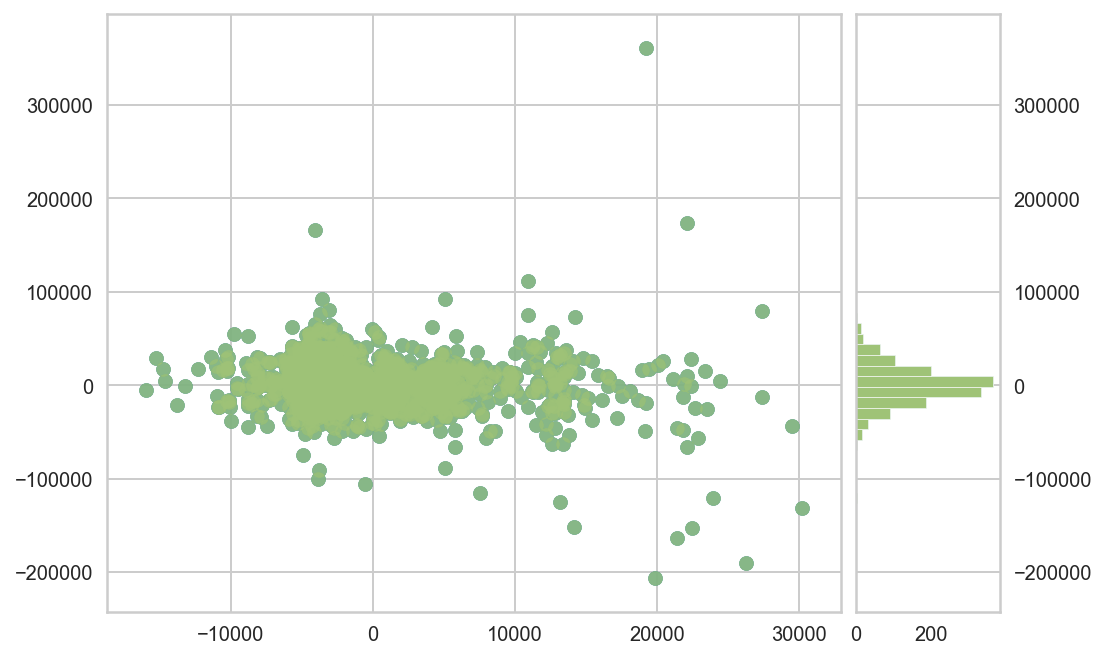

In [68]:
# Use ResidualsPlot to check if the linear regression medol appropriate for the data
from yellowbrick.regressor import ResidualsPlot
ResidualsPlot(lcv_reno2).fit(X_reno_limit_stad, y_residuals).score(X_reno_limit_stad, y_residuals)

In [69]:
# Make a dataframe of the predictors (for using eli5 later)
X_reno_limit_stad_df=pd.DataFrame(X_reno_limit_stad,columns=X_reno.columns[selector.get_support()])
X_reno_limit_stad_df

,LowQualFinSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,OverallQual,OverallCond,BsmtFinSF1,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf
0,-0.11789,-0.755487,0.221810,-0.354116,-0.116745,-0.270189,-0.087173,0.645239,-0.525832,0.571765,...,1.571273,-0.231903,-0.313823,-0.642849,-0.115228,-0.152606,-0.098739,-0.181007,-0.196677,0.404628
1,-0.11789,1.618683,-0.713769,-0.354116,-0.116745,-0.270189,-0.087173,-0.083419,2.184322,1.167999,...,-0.636427,-0.231903,-0.313823,-0.642849,-0.115228,-0.152606,-0.098739,-0.181007,-0.196677,0.404628
2,-0.11789,-0.755487,-0.069600,-0.354116,-0.116745,-0.270189,-0.087173,0.645239,-0.525832,0.089517,...,1.571273,-0.231903,-0.313823,-0.642849,-0.115228,-0.152606,-0.098739,-0.181007,-0.196677,0.404628
3,-0.11789,-0.755487,-0.176961,4.118256,-0.116745,-0.270189,-0.087173,0.645239,-0.525832,-0.502333,...,-0.636427,-0.231903,-0.313823,-0.642849,-0.115228,-0.152606,-0.098739,-0.181007,-0.196677,0.404628
4,-0.11789,0.774179,0.574569,-0.354116,-0.116745,-0.270189,-0.087173,1.373896,-0.525832,0.459971,...,1.571273,-0.231903,-0.313823,-0.642849,-0.115228,-0.152606,-0.098739,-0.181007,-0.196677,0.404628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,-0.11789,-0.755487,-0.100275,-0.354116,-0.116745,-0.270189,-0.087173,-0.083419,-0.525832,-0.975814,...,-0.636427,-0.231903,-0.313823,1.555574,-0.115228,-0.152606,-0.098739,-0.181007,-0.196677,0.404628
1446,-0.11789,2.025000,-0.713769,-0.354116,-0.116745,-0.270189,-0.087173,-0.083419,0.377553,0.755896,...,-0.636427,-0.231903,-0.313823,-0.642849,-0.115228,-0.152606,-0.098739,-0.181007,5.084472,-2.471405
1447,-0.11789,-0.755487,0.206473,-0.354116,-0.116745,-0.270189,4.938307,0.645239,3.087707,-0.373003,...,1.571273,-0.231903,-0.313823,-0.642849,-0.115228,-0.152606,-0.098739,-0.181007,-0.196677,0.404628
1448,-0.11789,2.160440,-0.713769,1.487449,-0.116745,-0.270189,-0.087173,-0.812076,0.377553,-0.868404,...,1.571273,-0.231903,-0.313823,-0.642849,-0.115228,-0.152606,-0.098739,-0.181007,5.084472,-2.471405


In [70]:
import eli5

eli5.show_weights(lcv_reno2, feature_names=X_reno_limit_stad_df.columns.values)

/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight?,Feature
+3849.602,KitchenQual_Ex
+3162.807,OverallCond
+2304.003,BsmtExposure_Gd
+1441.514,Exterior1st_BrkFace
+1000.998,OverallQual
+582.116,ScreenPorch
+389.322,Exterior2nd_ImStucc
+52.296,ExterQual_Ex
-19.709,BsmtCond_Fa
-124.942,GarageFinish_RFn


In [71]:
# From the above table, we know that excellent kitchen quality, good overall condition of the house, Good Exposure of 
# walkout or garden level walls, brick face exterior covering on house, excellent overall material and finish of the 
# house, and large square feet of Screen porch area greatly brougt the house price up.

## How to use these two models for the company's decision making


By now, I have built two models: the first one is the Lasso model l (used fixed features to predict house price), the
second one is the LassoCV model lcv_reno2 (evaluate the easy-to-change features's effect on the price residuals ). We 
can use the models in decision making for the following aspects:
1. Use the first models l to estimate the price for a target house, and then use the estimated price as the budget 
   guide to decide whether or not purchase the target house
   
    Estimated price = prediction from model l 
   
2. If the company aim to renovate a house, we can use the second model lcv_reno2 to evaluate the effect on house price 
    change after the renovation. 
    
    Estimated price change = Predicted residuals - residuals before renovation
    The budget of renovation should less than (Estimated price change - acceptable profit of the project)
    
3. When deciding whether or not buy a house, make sure the following features are fully evaluated and taken into 
   consideration because they greatly contribute to the house price:
   
    Fixed_features:'GrLivArea', 'GarageCars','BsmtQual', 'Neighborhood','2ndFlrSF', 'HouseStyle','LotArea', 
   'KitchenAbvGr', 'YearBuilt', 'BedroomAbvGr'.
  
    Renovate-able features: 'KitchenQual_EX', 'OverallCond', 'BsmtExposure_Gd', 'Exterior1st_BrkFace', 'OverallQual',
   'ScreenPorch'.

## Some other things to try for this project
- SimpleImputer
- OneHotEncoder
- Pipeline
- FeatureImportances

In [72]:
# The following codes for this part are from Masum. I keep them in the notebook for study purpose.

In [73]:
# Get the dummy code columns for the categorical fixed features
dummies_fixed = pd.get_dummies(house_R_fixed2)

# Find out those low varianc features (The variances are so low, indicate the features are not changing. It means they
# have no contribution to house sale price)
dummies_fixed.T[dummies_fixed.var()<0.006].T
# \.sort_values().plot.barh(figsize=(10,30))

,street_Grvl,street_Pave,lotconfig_FR3,neighborhood_Blueste,conditionone_PosA,conditionone_RRNe,conditionone_RRNn,conditiontwo_Artery,conditiontwo_Feedr,conditiontwo_PosA,...,functional_Sev,garagetype_2Types,garagetype_CarPort,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_Oth,salecondition_AdjLand
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
y = house_R_fixed2['saleprice']

X = house_R_fixed2.drop('saleprice',axis=1)

In [75]:
# house_R_fixed2.select_dtypes('object').columns

!conda install -c conda-forge category_encoders eli5 -y

Solving environment: done

## Package Plan ##

  environment location: /Users/carolcheng/anaconda3

  added / updated specs:
    - category_encoders
    - eli5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |   py37hc8dfbb8_1         148 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_0         3.0 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  certifi              pkgs/main::certifi-2019.11.28-py37_0 --> conda-forge::certifi-2019.11.28-py37hc8dfbb8_1
  conda                       pkgs/main::conda-4.8.2-py37_0 --> c

In [76]:
# Use OneHotEncoder to preprocess the data (Encode categorical features as a one-hot numeric array. The encoder 
# derives the categories based on the unique values in each feature. This encoding is needed for feeding categorical 
# data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.)

import category_encoders as ce
ce.OneHotEncoder().fit_transform(house_R_fixed2)

,mssubclass,mszoning_1,mszoning_2,mszoning_3,mszoning_4,lotfrontage,lotarea,street_1,street_2,alley_1,...,saletype_7,saletype_8,saletype_9,salecondition_1,salecondition_2,salecondition_3,salecondition_4,salecondition_5,salecondition_6,saleprice
0,60,1,0,0,0,65.0,8450,1,0,1,...,0,0,0,1,0,0,0,0,0,208500
1,20,1,0,0,0,80.0,9600,1,0,1,...,0,0,0,1,0,0,0,0,0,181500
2,60,1,0,0,0,68.0,11250,1,0,1,...,0,0,0,1,0,0,0,0,0,223500
3,70,1,0,0,0,60.0,9550,1,0,1,...,0,0,0,0,1,0,0,0,0,140000
4,60,1,0,0,0,84.0,14260,1,0,1,...,0,0,0,1,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1,0,0,0,62.0,7917,1,0,1,...,0,0,0,1,0,0,0,0,0,175000
1456,20,1,0,0,0,85.0,13175,1,0,1,...,0,0,0,1,0,0,0,0,0,210000
1457,70,1,0,0,0,66.0,9042,1,0,1,...,0,0,0,1,0,0,0,0,0,266500
1458,20,1,0,0,0,68.0,9717,1,0,1,...,0,0,0,1,0,0,0,0,0,142125


In [77]:
# Build a pipeline to preprocess the data

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

pipe=make_pipeline(SimpleImputer(strategy='most_frequent'),ce.OneHotEncoder(),VarianceThreshold(threshold=0.01))
# VarianceThreshold(threshold=0.01): Features with variance lower than 0.01 will be removed. 
pd.DataFrame(pipe.fit_transform(house_R_fixed2))

# SimpleImputer: Use SimpleImputer to replace the missing values with 'most_frequent' value in that column.
# OneHotEncoder: Use OneHotEncoder to encode categorical features as a one-hot numeric array
# VarianceThreshold: It is a feature selector that removes all low-variance features. (This feature selection 
# algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised 
# learning.)

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,60.0,1.0,0.0,0.0,0.0,65.0,8450.0,1.0,0.0,1.0,...,2.0,2008.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,208500.0
1,20.0,1.0,0.0,0.0,0.0,80.0,9600.0,1.0,0.0,1.0,...,5.0,2007.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,181500.0
2,60.0,1.0,0.0,0.0,0.0,68.0,11250.0,1.0,0.0,0.0,...,9.0,2008.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,223500.0
3,70.0,1.0,0.0,0.0,0.0,60.0,9550.0,1.0,0.0,0.0,...,2.0,2006.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,140000.0
4,60.0,1.0,0.0,0.0,0.0,84.0,14260.0,1.0,0.0,0.0,...,12.0,2008.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,60.0,1.0,0.0,0.0,0.0,62.0,7917.0,1.0,0.0,1.0,...,8.0,2007.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,175000.0
1446,20.0,1.0,0.0,0.0,0.0,85.0,13175.0,1.0,0.0,1.0,...,2.0,2010.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,210000.0
1447,70.0,1.0,0.0,0.0,0.0,66.0,9042.0,1.0,0.0,1.0,...,5.0,2010.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,266500.0
1448,20.0,1.0,0.0,0.0,0.0,68.0,9717.0,1.0,0.0,1.0,...,4.0,2010.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,142125.0


In [78]:
# Select RidgeCV model for fitting the data from fixed features, and use the predictions for getting residuals
ll=RidgeCV()

# Use the built pipeline to standardize the predictors
X_stad = pipe.fit_transform(house_R_fixed2.drop('saleprice',axis=1))
# Then fit the model and get predicted prices
y_preditions = ll.fit(X_stad,y).predict(X_stad)
# Then calculate the residuals and assign the list as the target
y_residuals = house_R_fixed2['saleprice'] - y_preditions
# check the len of the target
print(len(y_residuals))

# the predictors are the renovate_able features
# X_reno = house_R_reno_cleaned.drop('SalePrice', axis=1)
# standardize the predictors
# X_reno_stad = ss.fit_transform(X_reno)
# check the shape of the predictors set
# X_reno_stad.shape

1450


In [79]:
# Check the performance of the above model that applied on fixed features.
ll.score(X_stad,y)

0.8604693691004721

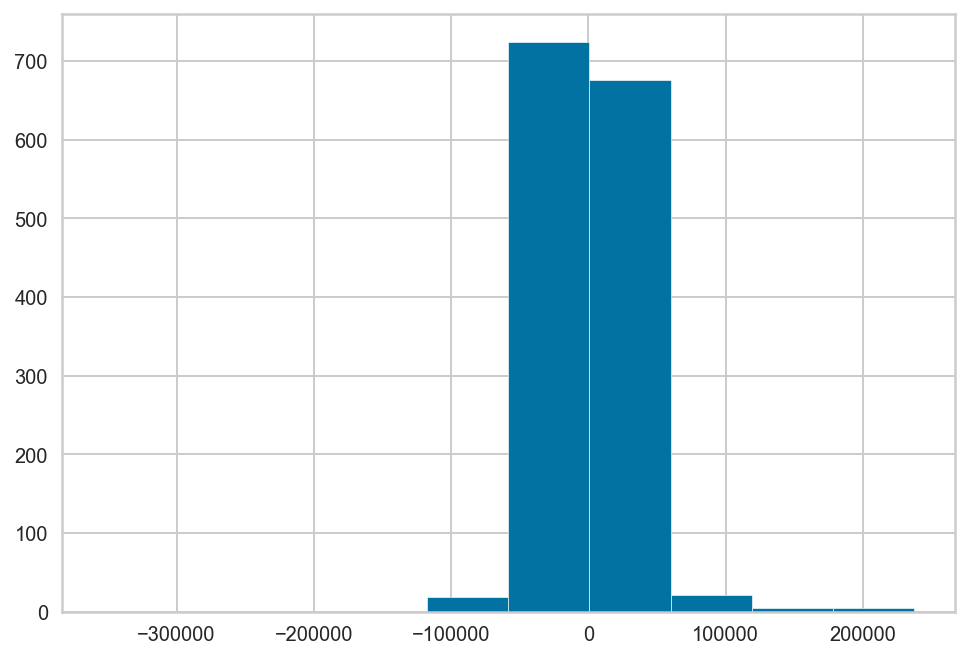

In [80]:
# Check the distribution of the residuals.
y_residuals.hist()

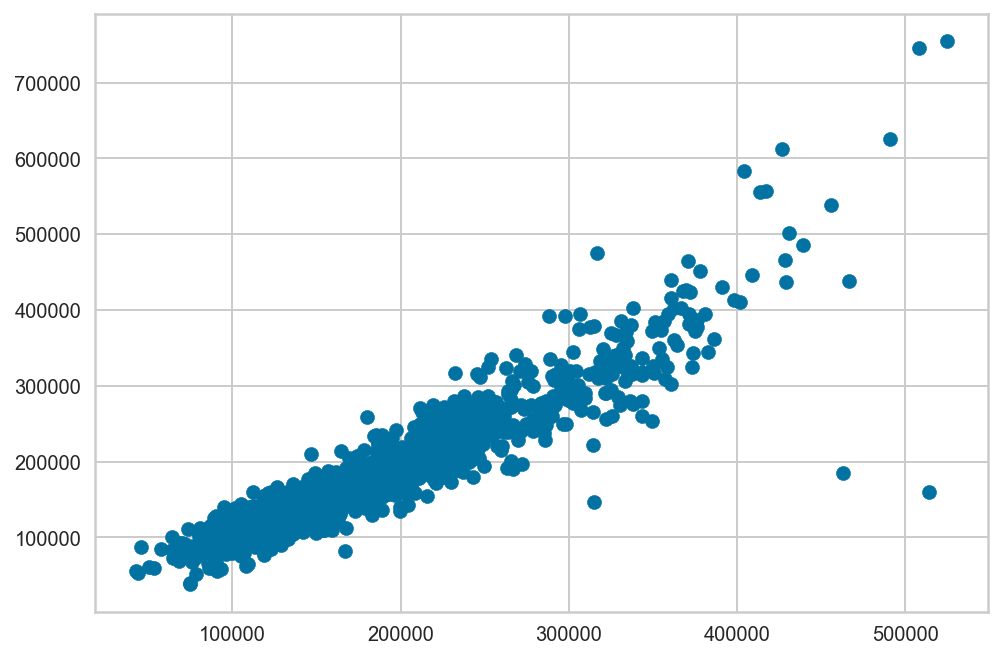

In [81]:
# Plot a scatter to check the relationship between the predictions and the actual house prices.
plt.scatter(x=y_preditions,y=y)

In [82]:
# Check the standard deviation of the residuals
y_residuals.std()

29575.425250472614

In [83]:
from yellowbrick.regressor import ResidualsPlot

0.8604693691004721

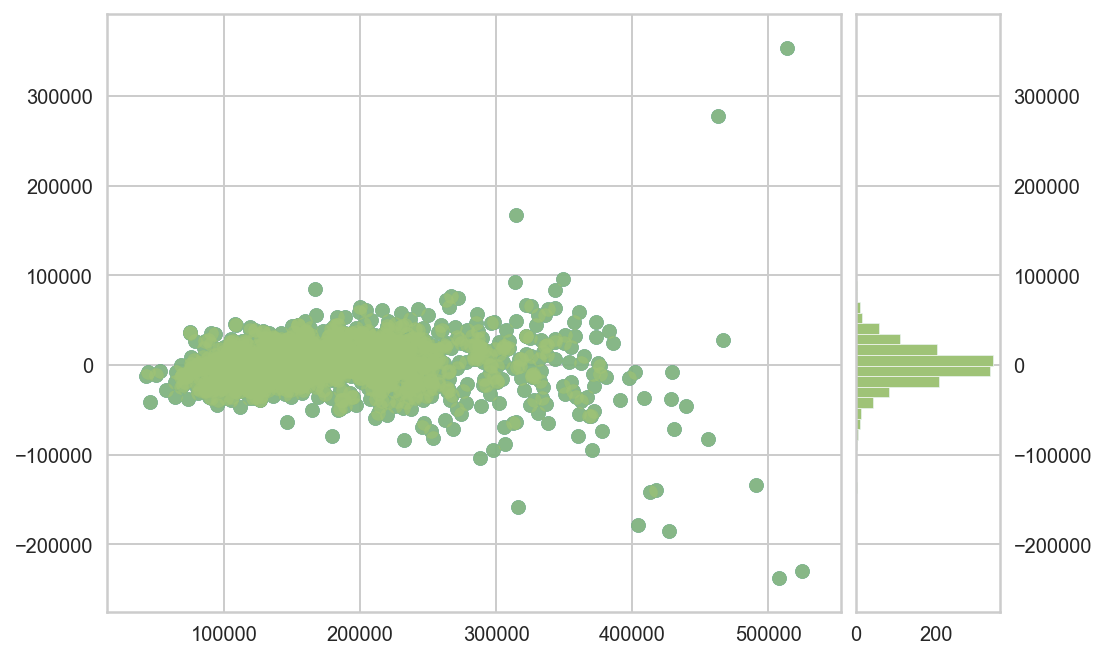

In [84]:
# Use ResidualsPlot to check if the previous model that we used to get the residuals performs well.

ResidualsPlot(ll).fit(X_stad,y).score(X_stad,y)
# ()(ll,X_stad.values,y)

# A residual plot shows the residuals on the vertical axis and the independent variable on the horizontal axis.
# A common use of the residuals plot is to analyze the variance of the error of the regressor. 

# If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate 
# for the data; otherwise, a non-linear model is more appropriate.

In [85]:
house_R_reno.isna().sum()

RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
BsmtCond           37
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
LowQualFinSF        0
KitchenQual         0
FireplaceQu       681
GarageFinish       79
GarageQual         79
GarageCond         79
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolQC           1443
Fence            1172
MiscFeature      1398
MiscVal             0
Utilities           0
OverallQual         0
OverallCond         0
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
SalePrice           0
dtype: int64

In [86]:
# Make another pipeline to preprocess the data that with renovate-able features

pipe2=make_pipeline(ce.OneHotEncoder(),VarianceThreshold(threshold=0.01))
pipe2.fit_transform(house_R_reno)


array([[     1,      0,      1, ...,      0,    150, 208500],
       [     1,      0,      1, ...,      0,    284, 181500],
       [     1,      0,      1, ...,      0,    434, 223500],
       ...,
       [     1,      0,      1, ...,      0,    877, 266500],
       [     0,      1,      1, ...,   1029,      0, 142125],
       [     1,      0,      1, ...,    290,    136, 147500]])

In [87]:
# Set target for modeling
target = y_residuals

In [88]:
# Set the variables for modeling

Xchange=pd.DataFrame(pipe2.fit_transform(house_R_reno.drop('SalePrice',axis=1)),\
                     columns=pipe2[0].transform(house_R_reno.drop('SalePrice',axis=1)).columns[pipe2[1].get_support()])


X_train,X_test, y_train,y_test = train_test_split(Xchange,target,test_size=0.2)
X_train.shape,y_train.shape

((1160, 103), (1160,))

In [89]:
# Use a LassoCV model to train the data, and use cross validation to get the scores on trainning data

ll2=LassoCV()

ll2.fit(Xchange,target)
# ll2.score(Xchange,target)
cross_val_score(ll2,X_train,y_train)

array([-0.00286429,  0.00888567,  0.00544475,  0.05055806, -0.00061999])

In [90]:
X_train

,RoofStyle_1,RoofStyle_2,RoofMatl_1,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,...,BsmtFinType1_7,BsmtFinSF1,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,BsmtFinSF2,BsmtUnfSF
513,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1264
1330,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,858
914,1,0,1,1,0,0,0,0,0,0,...,0,28,1,0,0,0,0,0,0,1288
328,1,0,1,0,0,1,0,0,0,0,...,0,846,1,0,0,0,0,0,0,210
1196,0,1,1,0,0,0,1,0,0,0,...,0,485,0,1,0,0,0,0,177,1496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,1,1,0,0,1,0,0,0,0,...,0,1024,1,0,0,0,0,0,0,481
919,1,0,1,0,1,0,0,0,0,0,...,0,552,1,0,0,0,0,0,0,280
502,1,0,1,1,0,0,0,0,0,0,...,0,380,1,0,0,0,0,0,0,397
104,1,0,1,1,0,0,0,0,0,0,...,0,104,0,1,0,0,0,0,169,516


In [91]:
# Check the score on test data
ll2.score(X_test,y_test)

0.09651272126904986

0.09651272126904986

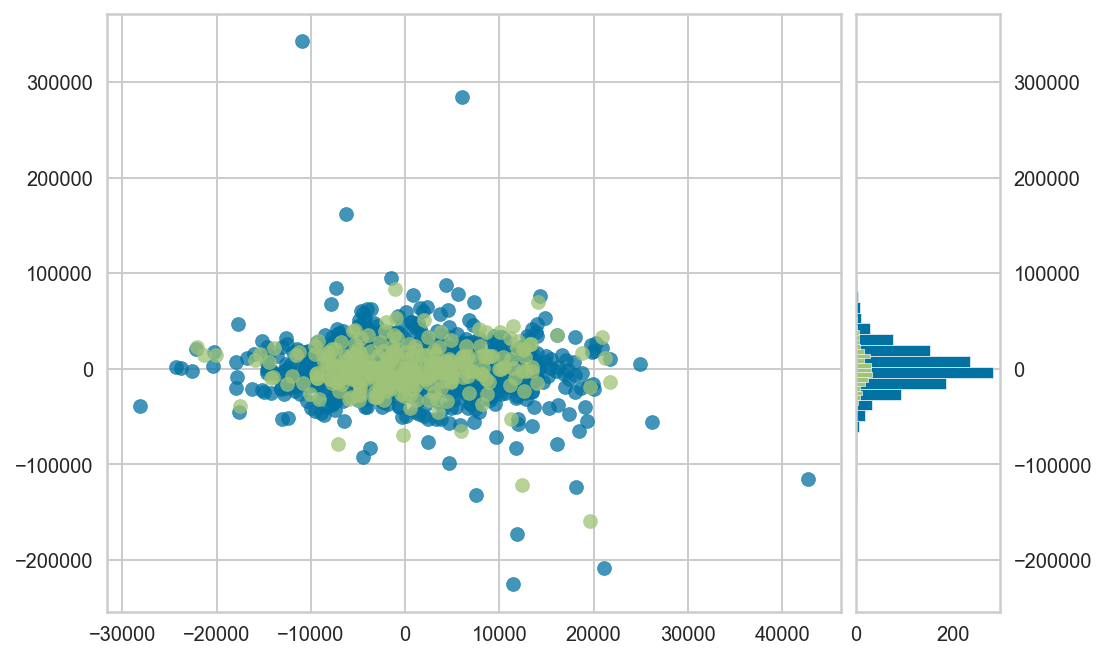

In [92]:
# Use ResidualsPlot to check if the linear regression medol appropriate for the data
ResidualsPlot(ll2).fit(X_train,y_train).score(X_test,y_test)

In [93]:
# Make a dataframe of the predictors for using yellowbrick FeatureImportances later
Xchange_df=pd.DataFrame(Xchange,columns=pipe2[0].transform(house_R_reno.drop('SalePrice',axis=1)).columns[pipe2[1].get_support()])

/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/carolcheng/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a24a5fa10>,
                   colormap=None, colors=None, is_fitted='auto', labels=None,
                   model=None, relative=True, stack=False, xlabel=None)

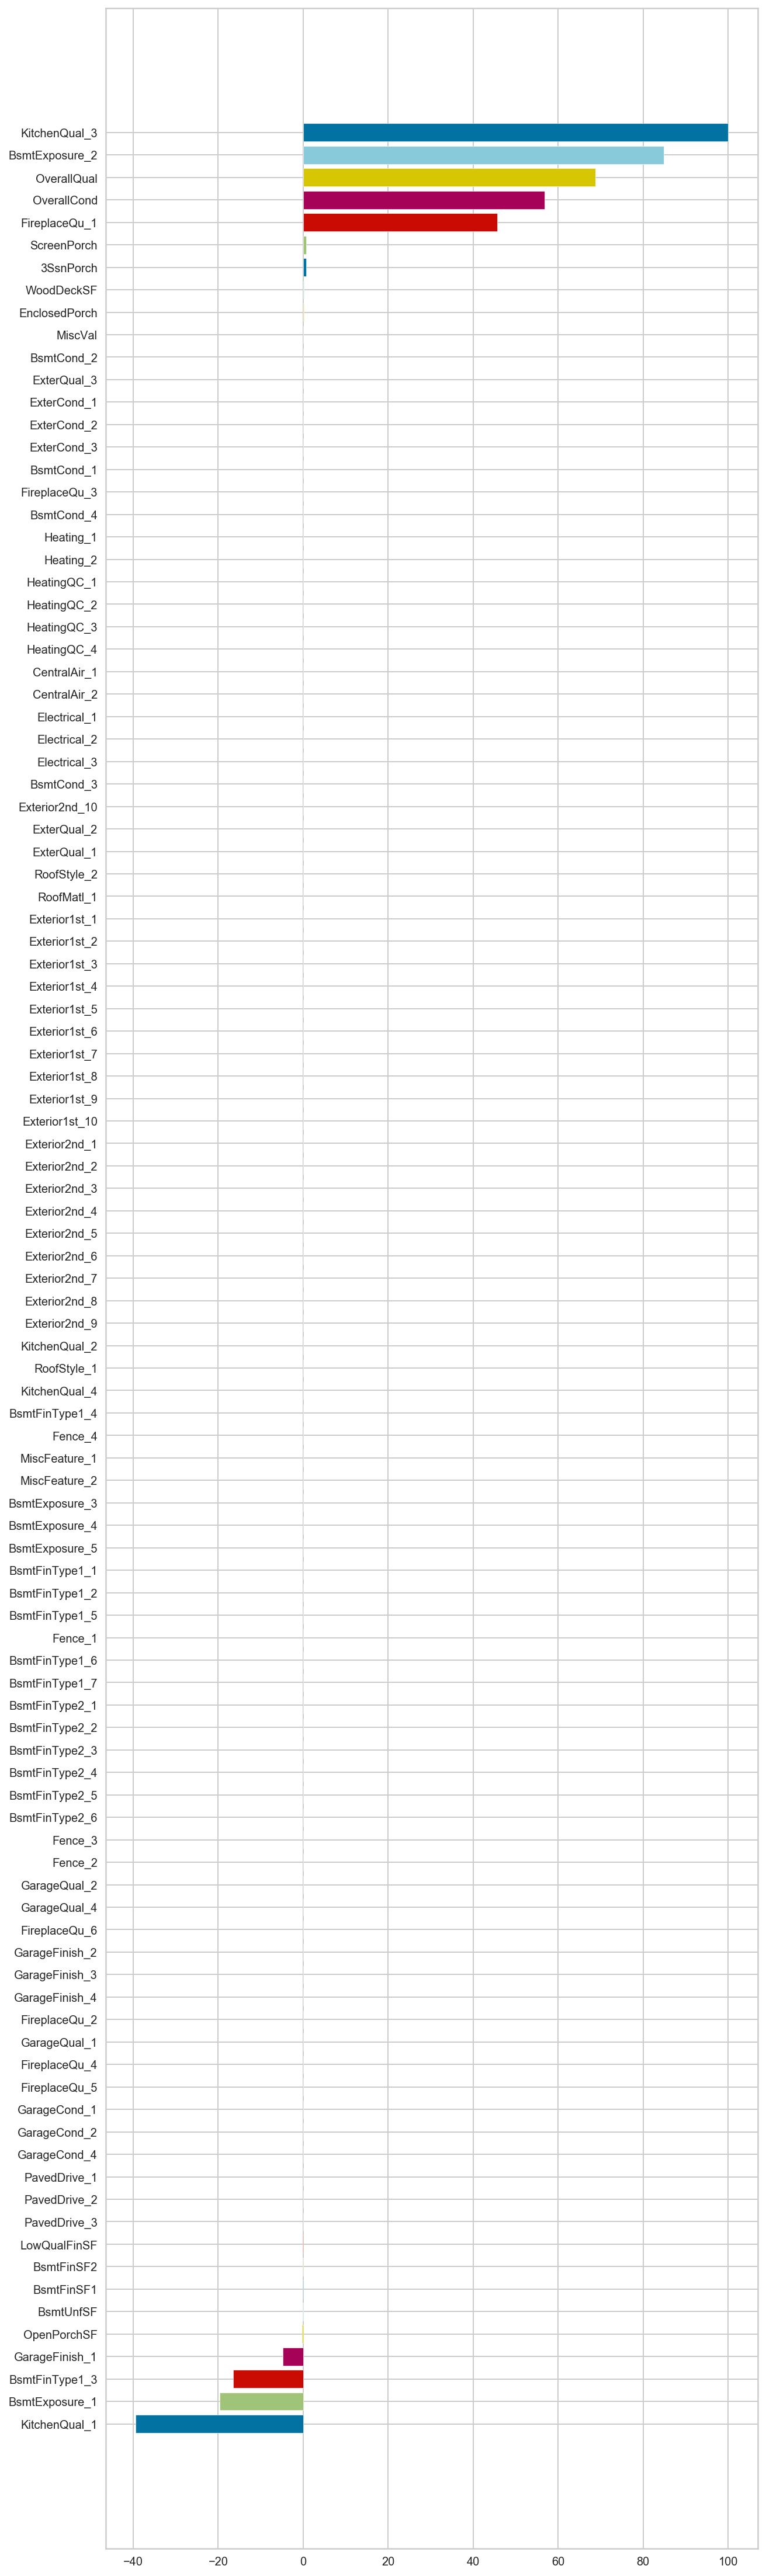

In [94]:
# The feature engineering process involves selecting the minimum required features to produce a valid model because 
# the more features a model contains, the more complex it is (and the more sparse the data), therefore the more 
# sensitive the model is to errors due to variance. A common approach to eliminating features is to describe their 
# relative importance to a model, then eliminate weak features or combinations of features and re-evalute to see if 
# the model fairs better during cross-validation.

# The Yellowbrick FeatureImportances visualizer rank and plot relative importances.

from yellowbrick.model_selection import FeatureImportances
fig,ax=plt.subplots(figsize=(10,40))
FeatureImportances(ll2,ax=ax).fit(Xchange_df,target)

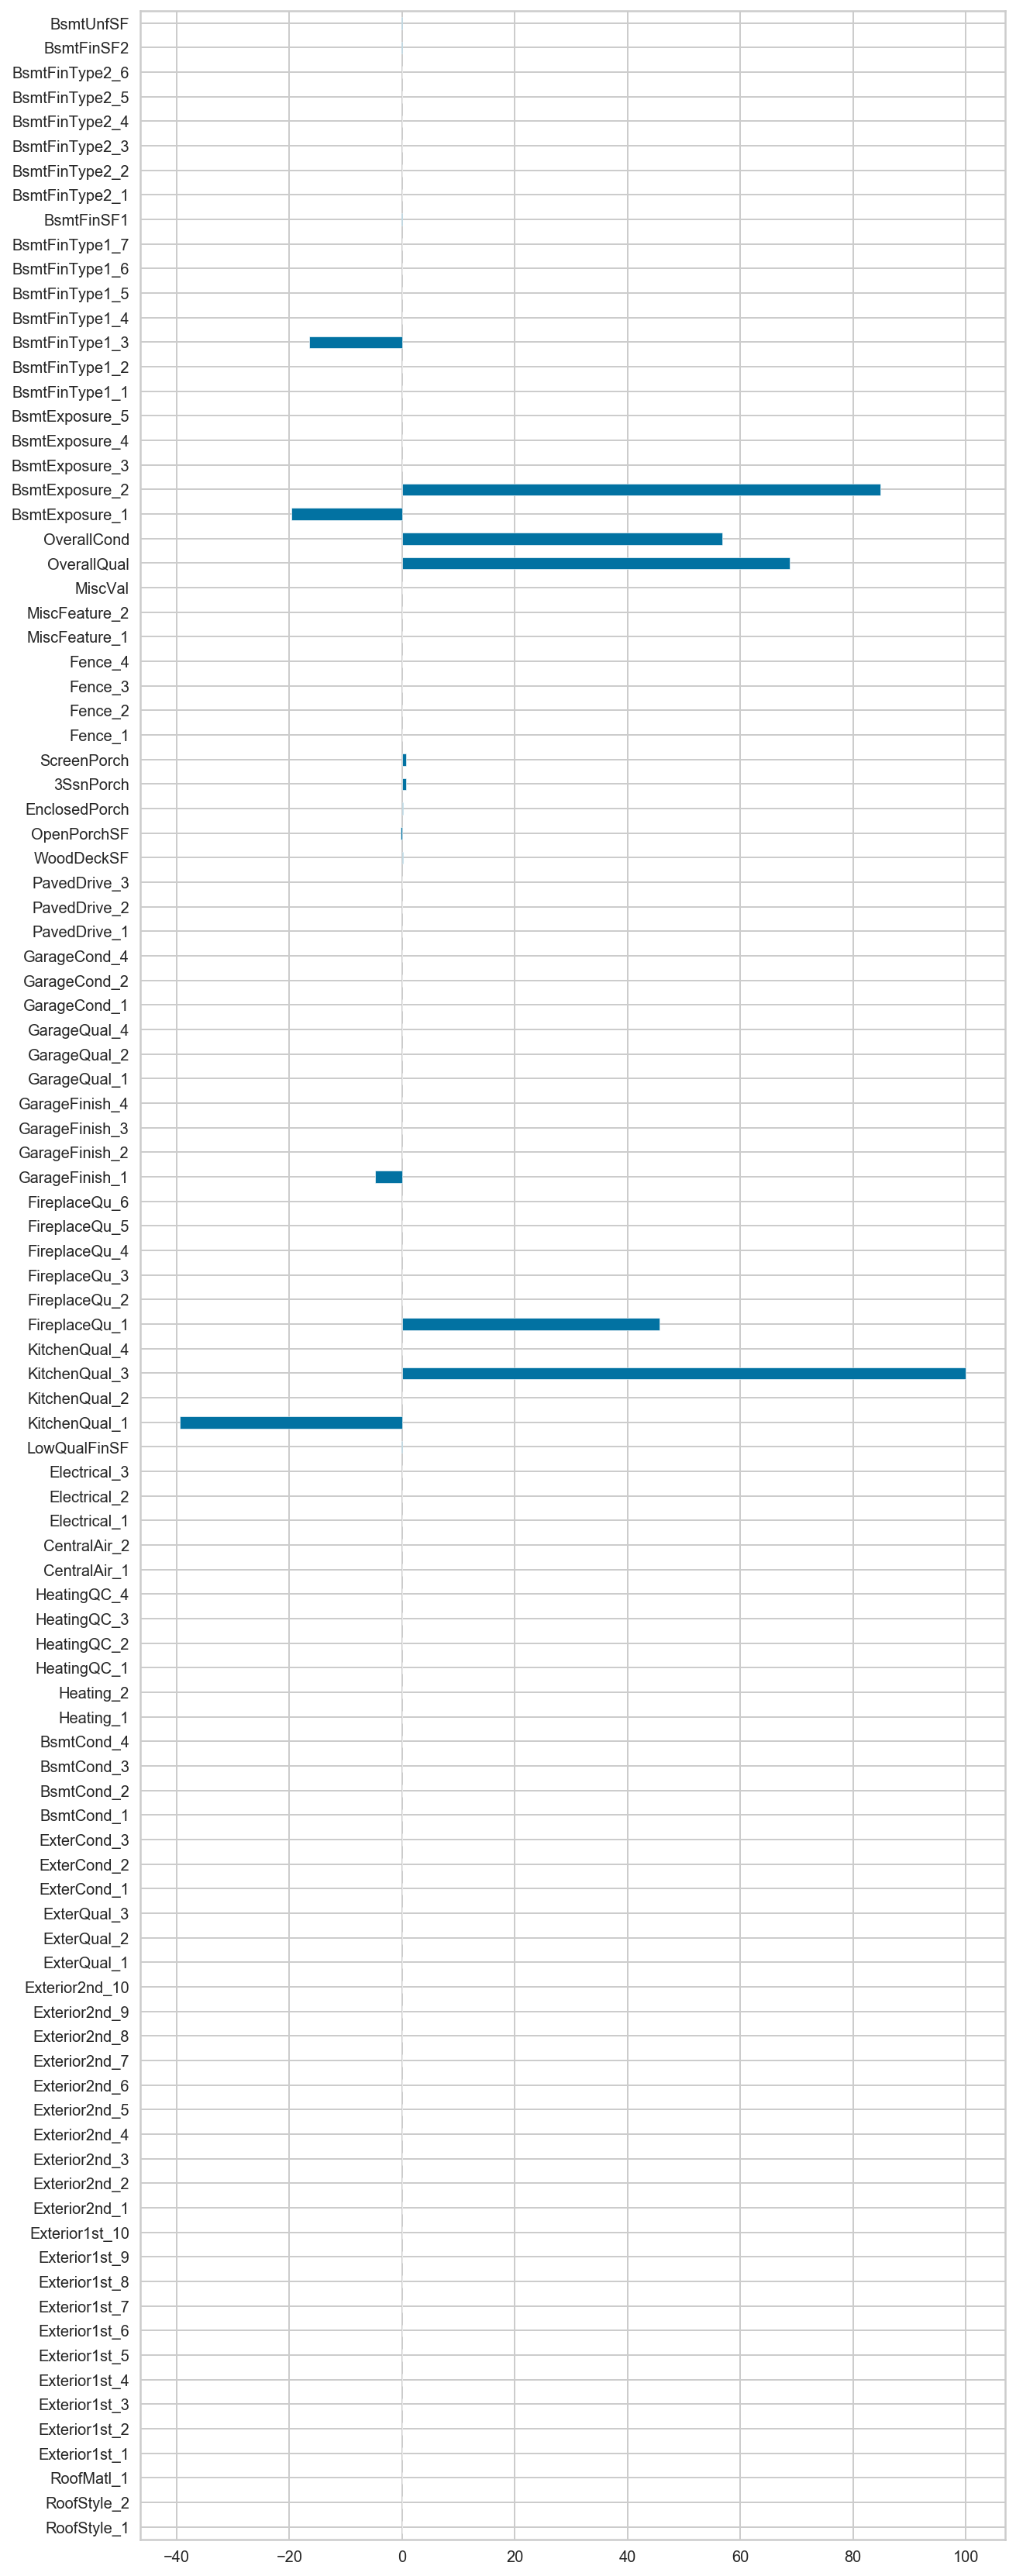

In [95]:
pd.Series(ll2.coef_,index=Xchange_df.columns).plot.barh(figsize=(10,30))

In [96]:
y_preditions

array([210610.60860591, 169445.86315651, 214291.21833966, ...,
       244409.1352448 , 146547.25689108, 136485.52226282])

In [97]:
ll2.fit(Xchange_df,target)

eli5.show_weights(ll2,feature_names=X_train.columns.values)

Weight?,Feature
+6192.910,KitchenQual_3
+5253.025,BsmtExposure_2
+4259.491,OverallQual
+3520.748,OverallCond
+2824.985,FireplaceQu_1
+45.620,ScreenPorch
+41.673,3SsnPorch
+8.369,WoodDeckSF
+6.051,EnclosedPorch
+0.164,MiscVal
